# Understanding the AWRA Community Modelling System package and its modules

   1. What is the AWRA CMS?
   2. AWRA-CMS package and modules
   3. AWRA CMS concepts and classes  




## 1.  What is the AWRA CMS?




   - Available to ***the community*** https://github.com/awracms/awra_cms/
   - Enables joint development and own application
   - ***Documentation***:
       - the ***User Guide*** https://github.com/awracms/awra_cms/blob/master/docs/AWRA_Community_Modelling_System_User_Guide.pdf

![title](awracms_schematic.PNG)


### How do I install and use the AWRA CMS?

 - **Training course**: 
    - Python, the AWRA CMS packages and Jupyter are preinstalled running on a Virtual machine
 - **Own application**: 
    - Following the course, you may want to install the AWRA CMS on your own system, rather than using the Virtual machine.
    - It is strongly recommended that you follow the instructions listed below to:
         - install Python within the specified CONDA environment (a particular environment is specified to ensure all packages work)
         - install AWRA MS including required package dependancies
    - Instructions:
        - the ***User Guide*** https://github.com/awracms/awra_cms/blob/master/docs/AWRA_Community_Modelling_System_User_Guide.pdf
        - the ***INSTALL.md*** file with the package https://github.com/awracms/awra_cms/blob/master/INSTALL.md
    
### Having issues with installing?
If you have any questions relating to install contact us at:
***awracms@bom.gov.au***

## 2. AWRA-CMS package and modules

#### There are 6 module components to the AWRAMS python package
* ***awrams.models***        : the AWRA-L model code
* ***awrams.simulation***    : tools to run the model 
    * **ondemand**: keeps the inputs and outputs stored in memory - for fast interactive use
    * **server**: direct to disk output, used for large scale runs (larger than available memory)  
* ***awrams.visualisation*** : contains functions to facilitate viewing of outputs and inputs across periods and spatial extents
* ***awrams.calibration***   : contains tools for calibration and evaluation of sensitivity to model parameters
* ***awrams.benchmarking***  : contains tools to allow comparison of multiple model outputs to observations
* ***awrams.utils***         : contains various support tools used throughout the rest of the system

In [1]:
# import the modules
import awrams.models  # contains the awra model code
import awrams.simulation  # contains tools to run the model in memory or with written outputs
import awrams.visualisation # contains functions to facilitate viewing of outputs and inputs across periods and spatial extents
import awrams.calibration # contains tools for calibration and evaluation of sensitivity to model parameters
import awrams.benchmarking # contains tools to allow comparison of multiple model outputs to observations
import awrams.utils # contains tools to enable extraction of data from model outputs

In [2]:
# see location of each of the components
# Note it is within your Virtual environment 
awrams.models

<module 'awrams.models' from '/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/models/__init__.py'>

#### There is a copy of the code provided in the awrams_cm folder to aid understanding
     
   - [Models folder]       :   /tree/models/awrams/models
   - [Simulation folder]   :   /tree/simulation/awrams/simulation
   - [Visualisation folder]:   /tree/visualisation/awrams/visualisation
   - [Calibration folder]  :   /tree/calibration/awrams/calibration
   - [Benchmarking folder] :   /tree/benchmarking/awrams/benchmarking 

[Models folder]: /tree/models/awrams/models
[Simulation folder]: /tree/simulation/awrams/simulation
[Visualisation folder]: /tree/visualisation/awrams/visualisation
[Calibration folder]: /tree/calibration/awrams/calibration
[Benchmarking folder]: /tree/benchmarking/awrams/benchmarking    

#### Use jupyter navigation to view/edit at copy of code:

  - For example the input tranforms file in the models folder [awrams/models/awral/transforms.py]
 
[awrams/models/awral/transforms.py]: ../../../edit/models/awrams/models/awral/transforms.py

# 3. AWRA CMS concepts and classes 



## 3.1 Configuring AWRA simulations and calibrations

 - Setting up a simulation or calibration run starts by defining:

   - A.  The **model** (in this case AWRAL) :
   - B.  The inputs and outputs via **the nodegraph**
      1. Inputs:
         - the forcing inputs (rain, temperature, radiation) 
         - the spatial inputs (grids of various landscape properties)
         - model parameters (calibrated or fixed)
      2. Outputs:
         - the model outputs to be written out (e.g. flow, evaporation, soil moisture)
         - the grid resolution (default is 0.05 degree)
         
   - C.  The spatial **extent** 
   - D.  The modelling time **period**



## 3.1.A. Load the awral model class from the models module



#### *Model* class (awrams.models.model.Model): see Model class within [awrams/models/model.py]

[awrams/models/model.py]: ../../../edit/models/awrams/models/model.py

- This Generic model class provides an interface for configuring and querying models.  
- All models must derive from this class.   
- Models conforming to this interface specification are used by various clients in AWRAMS:  
     - the **OnDemandSimulator** 
     - the **SimulationServer** and 
     - the AWRAMS **calibration** system.
- Models need to supply:
   - information about themselves (eg names of inputs, outputs and states), 
   - default input mapping (get_default_mapping())

#### The core AWRA-L model components are contained within the Model folder:

 - see copied code here [awrams/models/awral]
 - actual file is within the awrams package file within your conda environment install.

[awrams/models/awral]: /tree/models/awrams/models/awral


#### ***AWRALModel*** class: The AWRA-L specific child of *Model* parent class [awrams/models/awral/model.py]

[awrams/models/awral/model.py]: ../../../edit/models/awrams/models/awral/model.py




In [3]:
### A. Load the awral model class from the models module
from awrams.models import awral

In [4]:
# see the components of the awral class by tab completion (model, runner, settings, support, solar, template, transforms)
awral.model

<module 'awrams.models.awral.model' from '/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/models/awral/model.py'>

In [5]:
# Instantiate the AWRA-L model
awralmod = awral.model.AWRALModel()


### -----   Advanced Section:    Components of awrams.models.model.Model class -----------------------------------------------
#### Important components of awrams model class. 

##### [settings.py]
[settings.py]: ../../../edit/models/awrams/models/awral/settings.py

- Default configuration file:
   - locations of data files (input parameters, static spatial grids, climate grids), 
   - default model outputs, and 
   - compilation options are stored here.
- Default configuration can be overridden by specific ***User*** settings.py file:
   - /home/USERNAME/.awrams/settings.py
   - Users will need to create this file (and folder .awrams) manually, but can use it to override any of the default settings (or add a custom setting variable).
   
   
#### [transforms.py] , [solar.py] 
[solar.py]: ../../../edit/models/awrams/models/awral/solar.py
[transforms.py]: ../../../edit/models/awrams/models/awral/transforms.py

- AWRA-L supplies a number of custom node types for use in its input mapping graph;  
   - read awral.model.Model.get_default_input_mapping() for particulars.
   
#### [template.py]
[template.py]: ../../../edit/models/awrams/models/awral/template.py
- This file specifies how the awral_t.c is transformed into awral.c before compilation.   
- Modifying these templates is an advanced topic not covered here.

#### [runner.py]
[runner.py]: ../../../edit/models/awrams/models/awral/runner.py
- This contains the ModelRunner implementation, and associated support code for C bindings, and should not need to be modified.
     
#### *ModelRunner* class (awrams.models.model.ModelRunner)
 - Hydrological processes should be represented in the ModelRunner.  
 - This class provides the interface for executing model runs
    - taking the outputs from an ExecutionGraph, and 
    - running them through the model’s hydrological processes.
 - Every Model needs to supply a runner via the model.get_runner() call. 

#### C code  and Dynamic model compilation

 - The input mapping/configuration of AWRA-L is pure Python
 - The core of AWRA-L is implemented in C for performance reasons using a template file
 
 
 - **Templating**: lightweight templating library is used to autogenerate some portions of code
 
     - The model template file (**[awral_t.c]**) is compiled automatically when required
     
               see /models/awrams/models/awral/model/awral_t.c
 
     - Users wishing to edit the code should edit this file within the awra parackage
     - Recompilation occurs in particular when the mapping of input and output data changes
     
  - **Advantages**: 
     
     - Outputs can easily be added/removed, as well as input types changed (e.g. changing a scalar value to a spatial or timeseries forcing input), without users having to manually edit the C code
     - Does not recompile if not required


 

[awral_t.c]: ../../../edit/models/awrams/models/awral/core/awral_t.c
  
### We'll come back to altering the code in the Advanced section later today.

###  -----   End Advanced: Components of awrams.models.model.Model class ------------------------------------------------------

## 3.1.B. Input/Output Mappings and Nodegraphs

 - ***Mappings*** are python dictionaries used to describe the data-flow
      - AWRAMS ***NodeGraph*** subsystem (awrams.utils.nodegraph) transforms this **configuration** info into runnable code.
 - Default Input mapping: the ‘data’ portion of a model
      - loading of files
      - infilling
      - unit conversion etc. 
 - Example:
     - AWRA-L model uses a single temperature input, but AWAP supplies two (minimum and maximum temperature).  
     - The default AWRA-L input mapping loads the AWAP inputs then rectifies and computes a weighted average of these, before passing the single value on to the core model code. 

### B.1 Input configuration

#### Default input static spatial datasets and model parameters:  
  See data folder [../../models/awrams/models/awral/data/]
[../../models/awrams/models/awral/data/]: /tree/models/awrams/models/awral/data   

   - ***static spatial grids***:  various static soil, vegetation and topography related spatial datasets - see spatial_parameters.h5 (https://en.wikipedia.org/wiki/Hierarchical_Data_Format)
   - ***default model parameters***: see DefaultParameters.json (https://en.wikipedia.org/wiki/JSON)
   - ***model inputs***: complete list of input parameters (climate, static, spatial) - see model_inputs.json
   
for further details see [1.1_The_AWRA-L_model.ipynb]

[1.1_The_AWRA-L_model.ipynb]: /notebooks/Training/Basics/1.1_The_AWRA-L_model.ipynb

In [6]:
# list the complete set of model inputs - defined in INPUT_JSON_FILE=data/model_inputs.json file
import json
import pandas as pd
model_inputs = json.load(open(awral.settings.INPUT_JSON_FILE,'r'))
model_inputs

{'INPUTS_CELL': {'avpt': 'Vapour pressure',
  'k0sat': 'Hydraulic saturation (top)',
  'k_gw': 'Groundwater drainage coefficient',
  'k_rout': 'k_rout',
  'kdsat': 'Hydraulic saturation (deep)',
  'kr_0s': 'Interlayer saturation (top/shallow)',
  'kr_coeff': 'kr_coeff',
  'kr_sd': 'Interlayer saturation (shallow/deep)',
  'kssat': 'Hydraulic saturation (shallow)',
  'pair': 'Air pressure (pA)',
  'prefr': 'prefr',
  'pt': 'Precipitation (mm/day)',
  'radcskyt': 'radcskyt',
  'rgt': 'Solar radiation (MJ m^-2)',
  's0max': 'Maximum soil moisture (top)',
  'sdmax': 'Maximum soil moisture (deep)',
  'slope': 'slope',
  'slope_coeff': 'slope_coeff',
  'ssmax': 'Maximum soil moisture (shallow)',
  'tat': 'Temperature average (degC)',
  'u2t': 'Windspeed (m/s)'},
 'INPUTS_HRU': {'alb_dry': 'Dry Soil Albedo',
  'alb_wet': 'Wet Soil Albedo',
  'cgsmax': 'Conversion Coefficient From Vegetation Photosynthetic Capacity Index to Maximum Stomatal Conductance',
  'er_frac_ref': 'Ratio of Average Evap

### Need to map values to these AWRA-L input parameters

- See get_default_mapping() in [model.py]
- Various [nodes.py] types are used to map input values to these parameters
    - climate input from netcdf files:  nodes.forcing_from_ncfiles(CLIMATE_DATA,v[0],v[1])
    - static spatial inputs from grids: nodes.spatial_from_file(SPATIAL_FILE,'parameters/%s' % grid)
    - assigning a constant value eg. air pressure mapping['pair'] = nodes.const(97500.)
    - transformations: eg.
         - average temperature mapping['tat'] = nodes.mix('tmin','tmax',0.75)
         - multiplying a spatial grid by an input parameter mapping['s0max'] = nodes.mul('s0max_scale','s0fracawc_grid',100.)


[nodes.py]: ../../../edit/utils/awrams/utils/nodegraph/nodes.py
[model.py]: ../../../edit/models/awrams/models/awral/model.py

In [7]:
# View the default configuration mapping
default_config = awralmod.get_default_mapping()

In [8]:
default_config

alb_dry_hrudr : parameter([]):{'max': 0.5, 'fixed': True, 'value': 0.26, 'min': 0.1}
alb_dry_hrusr : parameter([]):{'max': 0.5, 'fixed': True, 'value': 0.26, 'min': 0.1}
alb_wet_hrudr : parameter([]):{'max': 0.5, 'fixed': True, 'value': 0.16, 'min': 0.1}
alb_wet_hrusr : parameter([]):{'max': 0.5, 'fixed': True, 'value': 0.16, 'min': 0.1}
avpt : transform(['tmin']):{'tfunc': {'name': 'pe', 'objtype': 'class', 'module': 'awrams.models.awral.transforms'}, 'func_args': {}}
cgsmax_hrudr : parameter([]):{'max': 0.05, 'fixed': False, 'value': 0.0320045265678736, 'min': 0.02}
cgsmax_hrusr : parameter([]):{'max': 0.05, 'fixed': False, 'value': 0.02371068048102, 'min': 0.02}
er_frac_ref_hrudr : parameter([]):{'max': 0.25, 'fixed': False, 'value': 0.0735562467806121, 'min': 0.04}
er_frac_ref_hrusr : transform(('er_frac_ref_hrudr', 0.5)):{'tfunc': {'name': 'multiply', 'objtype': 'class', 'module': 'numpy'}, 'func_args': {}}
f_tree_grid : spatial_from_file([]):{'preload': False, 'filename': '/data/

In [9]:
# Convenience function to allow you to inspect what goes into creating a parameter
from awrams.utils.nodegraph import nodes, graph
graph.get_input_tree(['k_rout'], default_config)

{'k_rout': transform(('k_rout_scale', 'k_rout_int', 'meanpet_grid')):{'tfunc': {'name': 'k_rout', 'objtype': 'class', 'module': 'awrams.models.awral.transforms'}, 'func_args': {}},
 'k_rout_int': parameter([]):{'max': 3, 'fixed': False, 'value': 0.157715263798048, 'min': 0.05},
 'k_rout_scale': parameter([]):{'max': 3, 'fixed': False, 'value': 0.0507853186467834, 'min': 0.05},
 'meanpet_grid': spatial_from_file([]):{'preload': False, 'filename': '/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/models/awral/data/spatial_parameters.h5', 'variable': 'parameters/meanPET'}}

### The input climate data and default path is specified within [models/settings.py]
[models/settings.py]: ../../../edit/models/awrams/models/settings.py

In [10]:
# climate forcing as specified in settings.py
awral.model.FORCING

{'precip': ('rain_day/rain*', 'rain_day'),
 'solar': ('solar_exposure_day/solar*', 'solar_exposure_day'),
 'tmax': ('temp_max_day/temp_max*', 'temp_max_day'),
 'tmin': ('temp_min_day/temp_min*', 'temp_min_day')}

In [11]:
# view default data path TRAINING_DATA_PATH
from awrams.models.settings import TRAINING_DATA_PATH
TRAINING_DATA_PATH

'/data/cwd_awra_data/AWRACMS/Training/test_data/'

In [12]:
# climate data path as specified in 
awral.model.CLIMATE_DATA

'/data/cwd_awra_data/AWRACMS/Training/test_data/climate/BOM_climate/'

In [13]:
# the following path defines where the precipitation forcing data is located
graph.get_input_tree(['precip_f'], default_config)

{'precip_f': forcing_from_ncfiles([]):{'path': '/data/cwd_awra_data/AWRACMS/Training/test_data/climate/BOM_climate/', 'cache': False, 'nc_var': 'rain_day', 'pattern': 'rain_day/rain*'}}

#### Input climate data is read by default according to the following pattern 

nc_var=path  path +  pattern

rain_day=   ./rain_day/rain*

#### Need to alter this to point at your input data: We demontrate this below..

#### Datasets in AWRA CMS

AWRA CMS data folders contain:   

  - Climate inputs 
  - Starting model states
  - Benchmarking/validation observational datasets

#### Climate data supplied with the AWRA-CMS

***test_data***: The AWRA CMS package contains limited coverage sample input climate and observational test data in [../../test_data]:
[../../test_data]: ../../test_data

 - [Simulation] data: covering Dec 2009-Jan 2010 Nationally
 - [Calibration] data: covering 1990-2010 for 3 select catchments

[Simulation]: ../../test_data/simulation
[Calibration]: ../../test_data/calibration


***Training/test_data***: A more extensive coverage national dataset is supplied for training purposes within [../Training/test_data]: 
[../Training/test_data]: ../test_data

  - [../Training/test_data/climate/BOM_climate] climate data: covering Jan 2009-Dec 2010 nationally
[../Training/test_data/climate/BOM_climate]: ../test_data/climate/BOM_climate
 


##### An aside: The AWRAMS Configuration system (awrams.utils.settings)

The settings module is the main interface for configuration default data paths, memory usage settings etc (i.e. configuration options).

Default settings are imported in AWRAMS using the python command

       from awrams.utils import settings

AWRAMS provides a flexible mechanism for users to override default settings by using Python files in the following folder

        /home/$USERNAME/.awrams/
       
The primary user settings file is

        /home/$USERNAME/.awrams/settings.py
        
Users will need to create this file (and folder .awrams) manually, but can use it to override any of the default settings (or add a custom setting variable). The default settings are defined within the [settings.py] file contained in the cms model package folder.

In the context of the training material, all data is located via
        
        awrams.utils.settings.TRAINING_DATA_PATH
        
To install the training data to a custom path, the ***user*** settings.py file should contain the line  

        TRAINING_DATA_PATH = ‘/path/to/custom/training/data’ # Edit this to point to valid path

[settings.py]: ../../../edit/models/awrams/models/awral/settings.py


### Input daily climate (forcing) data: 
Daily climate data required for running the AWRA-L model includes:

 - ***rainfall***
 - ***temperature*** (an average of maximum and minimum values)
 - ***solar radiation***

The Bureau of Meteorology uses 0.05 degree gridded daily data based on 9am-9am observations and satellite data across Australia; see http://www.bom.gov.au/jsp/awap/. This data covers 1911 until yesterday, with the exception of solar radiation based on satellite data; where climatologies are used prior to 1990. You can use your own data provided you can format it into netcdf input file format.

***Simulation***: 

[../Training/test_data/simulation]: ../test_data/simulation

 - rainfall: rain_day_2000/2001.nc and climatology_daily_rain_day.nc
 - temperature: temp_max/min_2000/2001.nc and climatology_daily_temp_min/max_day.nc
 - solar radiation: solar_exposure_2000/2001.nc and climatology_daily_temp_min/max_day.nc
 
If you wish to download a longer period dataset please contact us as ***awracms@bom.gov.au*** for assistance.

***Calibration***: Limited coverage (select catchments for 1990-2010) example climate data is supplied with the AWRACMS package,  see: /Training/test_data/calibration:
  - rain, temp_max/min, solar exposure: [variable_name]_1990/2010.nc
  
### Input starting states
The AWRA-L model have the following model states that change from one time-step to the next:

  - **mleaf** : vegetation mass (mm) [for deep rooted (dr) and shallow rooted (sr) HRUs]
  - **s0**    : top layer 0-10cm soil moisture (mm)  [for deep rooted (dr) and shallow rooted (sr) HRUs]
  - **ss**    : upper layer 10cm-100cm soil moisture (mm) [for deep rooted (dr) and shallow rooted (sr) HRUs]
  - **sd**    : deep layer 100cm-600cm soil moisture (mm) [for deep rooted (dr) and shallow rooted (sr) HRUs]
  - **sg**    : saturated groundwater storage (mm)
  - **sr**    : surface water storage (mm)
  
These states are saved as part of model simulation, for potential use in initialising model runs. These inital states are required to be specified when startig a simulatio of calibration, else default parameters will be used

In [14]:
# list files in the awracms test_data simulation directory
!ls ../../test_data/simulation

bom-rad_day-20101201-20101231.nc	 rain_day_2011.nc
bom-rad_day-20110101-20110131.nc	 s0_dr.nc
bom-rain_day-20101201-20101231.nc	 s0_sr.nc
bom-rain_day-20110101-20110131.nc	 sd_dr.nc
bom-tmax_day-20101201-20101231.nc	 sd_sr.nc
bom-tmax_day-20110101-20110131.nc	 sg_bal.nc
bom-tmin_day-20101201-20101231.nc	 solar_exposure_day_2010.nc
bom-tmin_day-20110101-20110131.nc	 solar_exposure_day_2011.nc
climatology_daily_rain_day.nc		 sr_bal.nc
climatology_daily_solar_exposure_day.nc  ss_dr.nc
climatology_daily_temp_max_day.nc	 ss_sr.nc
climatology_daily_temp_min_day.nc	 temp_max_day_2010.nc
mleaf_dr.nc				 temp_max_day_2011.nc
mleaf_sr.nc				 temp_min_day_2010.nc
outputs					 temp_min_day_2011.nc
rain_day_2010.nc


In [15]:
# list four variables folders: rain_day   (rainfall), solar_exposure_day   (solar radiation), temp_max_day   (maximum temperature), temp_min_day (temperature minimum)
!ls ../../Training/test_data/climate/BOM_climate

rain_day  solar_exposure_day  temp_max_day  temp_min_day


### Alter location of input climate data to ../../test_data/simulation

In [16]:
# Create a function change_path_to_forcing() to change from the default paths to  
def change_path_to_forcing(imap):
    from awrams.utils.nodegraph import nodes
    from os.path import join
    from os import getcwd

    data_path = '../../test_data/simulation/'
    FORCING = {
        'tmin': ('temp_min*.nc','temp_min_day',data_path),
        'tmax': ('temp_max*.nc','temp_max_day',data_path),
        'precip': ('rain_day*.nc','rain_day',data_path),
        'solar': ('solar*.nc','solar_exposure_day',data_path) #,
    }
    
    # location of registered user data in the Training folder
    #data_path = '../test_data/climate/BOM_climate/'
    #FORCING = {
    #    'tmin': ('temp_min*.nc','temp_min_day',data_path + 'temp_min_day/'),
    #    'tmax': ('temp_max*.nc','temp_max_day',data_path + 'temp_max_day/'),
    #    'precip': ('rain_day*.nc','rain_day',data_path + 'rain_day/'),
    #    'solar': ('solar*.nc','solar_exposure_day',data_path + 'solar_exposure_day/') #,
    #}     
    
    for k,v in FORCING.items():
        imap[k+'_f'] = nodes.forcing_from_ncfiles(v[2],v[0],v[1])

# alter the input map by calling function above
change_path_to_forcing(default_config)

In [17]:
# Path to Tmin data after change to default_config...
print('tmin_f',default_config['tmin_f'])

tmin_f forcing_from_ncfiles([]):{'path': '../../test_data/simulation/', 'cache': False, 'nc_var': 'temp_min_day', 'pattern': 'temp_min*.nc'}


### B.2 Output configuration


In [18]:
# default outputs
awralmod.get_output_mapping()

{'dd': output_variable([]):{'var_name': 'dd'},
 'e0': output_variable([]):{'var_name': 'e0'},
 'etot': output_variable([]):{'var_name': 'etot'},
 'mleaf_hrudr': output_variable([]):{'var_name': 'mleaf_hrudr'},
 'mleaf_hrusr': output_variable([]):{'var_name': 'mleaf_hrusr'},
 'qtot': output_variable([]):{'var_name': 'qtot'},
 's0': output_variable([]):{'var_name': 's0'},
 's0_hrudr': output_variable([]):{'var_name': 's0_hrudr'},
 's0_hrusr': output_variable([]):{'var_name': 's0_hrusr'},
 'sd': output_variable([]):{'var_name': 'sd'},
 'sd_hrudr': output_variable([]):{'var_name': 'sd_hrudr'},
 'sd_hrusr': output_variable([]):{'var_name': 'sd_hrusr'},
 'sg': output_variable([]):{'var_name': 'sg'},
 'sr': output_variable([]):{'var_name': 'sr'},
 'ss': output_variable([]):{'var_name': 'ss'},
 'ss_hrudr': output_variable([]):{'var_name': 'ss_hrudr'},
 'ss_hrusr': output_variable([]):{'var_name': 'ss_hrusr'}}

In [19]:
# list types of outputs

# OUTPUTS_HRU= outputs on a HRU basis
# OUTPUTS_AVG= outputs on a cell basis averaged from HRU values 
awralmod.OUTPUTS.keys()

dict_keys(['OUTPUTS_CELL', 'OUTPUTS_AVG', 'OUTPUTS_HRU'])

In [20]:
# OUTPUTS_CELL= outputs on a cell/grid/catchment basis
awralmod.OUTPUTS['OUTPUTS_CELL'] # ['qtot', 'sr', 'sg'] = runoff, surface water storage, groundwater storage

['qtot', 'sr', 'sg']

In [21]:
awralmod.OUTPUTS['OUTPUTS_HRU'] # ['s0', 'ss', 'sd', 'mleaf'] = top, shallow and seep soil moisture & leaf mass 

['s0', 'ss', 'sd', 'mleaf']

In [22]:
awralmod.OUTPUTS['OUTPUTS_AVG'] # ['e0', 'etot', 'dd', 's0', 'ss', 'sd']= potential and actual ET, deep drainage,top, shallow and seep soil moisture

['e0', 'etot', 'dd', 's0', 'ss', 'sd']

In [23]:
# add some extra outputs via the output_mapping
awralmod.OUTPUTS['OUTPUTS_CELL'].append('eg')
awralmod.OUTPUTS['OUTPUTS_CELL'].append('y')
awralmod.OUTPUTS['OUTPUTS_CELL'].append('qg')
awralmod.OUTPUTS['OUTPUTS_CELL'].append('qr')
awralmod.OUTPUTS['OUTPUTS_CELL'].append('qif')
awralmod.OUTPUTS['OUTPUTS_HRU'].append('ei')
awralmod.OUTPUTS['OUTPUTS_HRU'].append('et')
awralmod.OUTPUTS['OUTPUTS_HRU'].append('es')
awralmod.OUTPUTS['OUTPUTS_HRU'].append('fsat')
awralmod.OUTPUTS['OUTPUTS_HRU'].append('fegt')
awralmod.OUTPUTS['OUTPUTS_HRU'].append('us')
awralmod.OUTPUTS['OUTPUTS_HRU'].append('ud')

In [24]:
awralmod.get_output_mapping()

{'dd': output_variable([]):{'var_name': 'dd'},
 'e0': output_variable([]):{'var_name': 'e0'},
 'eg': output_variable([]):{'var_name': 'eg'},
 'ei_hrudr': output_variable([]):{'var_name': 'ei_hrudr'},
 'ei_hrusr': output_variable([]):{'var_name': 'ei_hrusr'},
 'es_hrudr': output_variable([]):{'var_name': 'es_hrudr'},
 'es_hrusr': output_variable([]):{'var_name': 'es_hrusr'},
 'et_hrudr': output_variable([]):{'var_name': 'et_hrudr'},
 'et_hrusr': output_variable([]):{'var_name': 'et_hrusr'},
 'etot': output_variable([]):{'var_name': 'etot'},
 'fegt_hrudr': output_variable([]):{'var_name': 'fegt_hrudr'},
 'fegt_hrusr': output_variable([]):{'var_name': 'fegt_hrusr'},
 'fsat_hrudr': output_variable([]):{'var_name': 'fsat_hrudr'},
 'fsat_hrusr': output_variable([]):{'var_name': 'fsat_hrusr'},
 'mleaf_hrudr': output_variable([]):{'var_name': 'mleaf_hrudr'},
 'mleaf_hrusr': output_variable([]):{'var_name': 'mleaf_hrusr'},
 'qg': output_variable([]):{'var_name': 'qg'},
 'qif': output_variable([

## 3.1.C. ***Extent*** specification
### The area over which the simulation/calibration/extraction occurs

In [25]:
# load extents
from awrams.utils import extents

In [26]:
# default extent - all of Australia
DefExt = extents.get_default_extent()  ## Australia, set as reference extent
DefExt

origin: -10.0,112.0, shape: (681, 841), cell_size: 0.05

In [27]:
# What is used to define this default extent?
import awrams.utils.settings as  settings
settings.DEFAULT_AWRAL_MASK

'/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/utils/data/mask.h5'

In [28]:
#### Any rectangular extent
my_extent = DefExt.icoords[-39.5:-44, 143.5: 149]   # Tasmania
my_extent

origin: -39.5,143.5, shape: (91, 111), cell_size: 0.05

In [29]:
#### a single point based on [lat, lon] pair
my_extent  = DefExt.icoords[-34,117]
print(my_extent)
print(my_extent.cell_count)

origin: -34.0,117.0, shape: (1, 1), cell_size: 0.05
1


In [30]:
##### extents from a shapefile (CATCHMENT_SHAPEFILE contains all calibraito and validation catchments)
from awrams.utils.gis import ShapefileDB
print('CATCHMENT_SHAPEFILE=',awrams.utils.gis.CATCHMENT_SHAPEFILE)
calvalshapefile = ShapefileDB(awrams.utils.gis.CATCHMENT_SHAPEFILE)
catchments = calvalshapefile.get_records_df()
# view only the first 5 rows of the shapefile table by using .head()
catchments.head()

CATCHMENT_SHAPEFILE= /data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/utils/data/Final_list_all_attributes.shp


,AI,AlbersArea,Cal_Val,CentrLat,CentrLon,DateOpen,DateQfinish,Downstr_1,Downstr_2,Downstr_3,...,MeanP,QComplete,RiverName,SlopeMean,SlopeRange,State,StationID,Whpk1_Mean,Whpk2_Mean,WrscID
0,3.035136,5792.427800,0,-24.659546,146.188956,1/01/1969,10/4/2011,0,0,0,...,556.338623,93.998816,Barcoo,1.01441,11.2756,QLD,003303,32.0211,70.6515,003303A
1,5.982206,320.401464,-1,-30.021958,139.517736,1/01/1972,1/10/1991,0,0,0,...,241.771332,29.554536,Hamilton Ck,3.66823,18.2268,SA,004502,35.0000,77.0000,AW004502
2,5.581191,1013.515346,1,-30.692950,139.006100,1/01/1973,13/3/1989,0,0,0,...,265.750458,35.540921,Mt McKinlay Ck,4.07388,22.4773,SA,004508,34.9490,76.5210,AW004508
3,5.224682,3323.972600,1,-23.974046,133.340785,1/01/1972,7/12/2011,0,0,0,...,314.112885,99.822406,Hugh,2.11346,28.3030,NT,005115,27.2579,81.0000,G0050115
4,4.809843,434.946800,-1,-23.436722,134.315857,1/01/1967,31/12/2011,0,0,0,...,352.356567,82.618026,Trephina Ck,2.64208,24.1171,NT,006005,22.8571,0.0000,G0060005


In [31]:
## Create a dictionary with multiple extents
# you can use individual extents from  
cal_dict = {}
cal_catchments = ['204007','421103']
for catchment in cal_catchments:
    cal_dict[catchment] = calvalshapefile.get_extent_by_field('StationID', catchment.zfill(6), parent_extent=DefExt)
cal_dict

{'204007': origin: -28.25,151.65, shape: (45, 27), cell_size: 0.05,
 '421103': origin: -33.25,149.15, shape: (4, 3), cell_size: 0.05}

## 3.1.D. ***Period*** specification
### Thie time period over which the simulation occurs

In [32]:
from awrams.utils import datetools as dt

In [33]:
myperiod = dt.dates('2000', '2010')

In [34]:
myperiod

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', length=4018, freq='D')

In [35]:
period = dt.dates('dec 2010 - 31 jan 2011')

In [36]:
period

DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-04',
               '2010-12-05', '2010-12-06', '2010-12-07', '2010-12-08',
               '2010-12-09', '2010-12-10', '2010-12-11', '2010-12-12',
               '2010-12-13', '2010-12-14', '2010-12-15', '2010-12-16',
               '2010-12-17', '2010-12-18', '2010-12-19', '2010-12-20',
               '2010-12-21', '2010-12-22', '2010-12-23', '2010-12-24',
               '2010-12-25', '2010-12-26', '2010-12-27', '2010-12-28',
               '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01',
               '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-09',
               '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13',
               '2011-01-14', '2011-01-15', '2011-01-16', '2011-01-17',
               '2011-01-18', '2011-01-19', '2011-01-20', '2011-01-21',
               '2011-01-22', '2011-01-23', '2011-01-24', '2011-01-25',
      

In [37]:
dt.dates?

### Demonstrational simulation
#### we will go through this in detail later

AWRA output variable names r.keys():


dict_keys(['mleaf_hrudr', 'ei_hrusr', 'ud_hrusr', 's0_hrudr', 'us_hrusr', 'es_hrudr', 'fsat_hrusr', 'eg', 'qg', 'sr', 'fsat_hrudr', 'ss_hrusr', 'fegt_hrudr', 'ss_hrudr', 'ss', 'final_states', 'sd_hrusr', 'sd_hrudr', 'y', 'et_hrudr', 'mleaf_hrusr', 'dd', 'e0', 'sg', 'et_hrusr', 'es_hrusr', 'ud_hrudr', 'etot', 'fegt_hrusr', 's0', 'ei_hrudr', 's0_hrusr', 'qr', 'us_hrudr', 'qtot', 'qif', 'sd'])

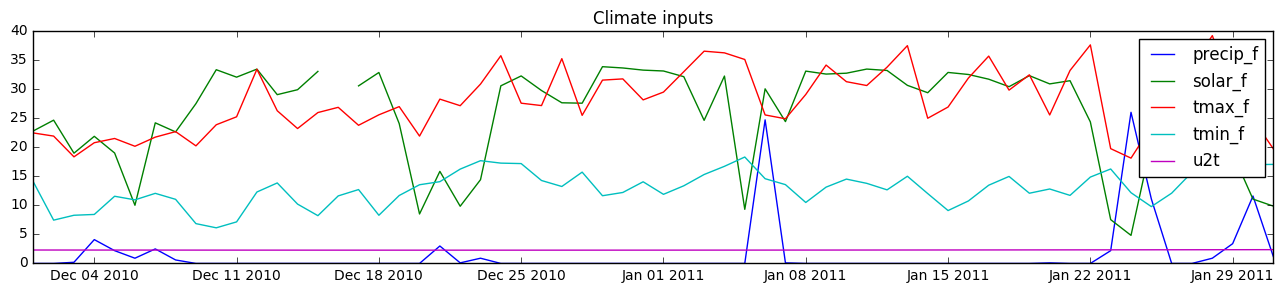

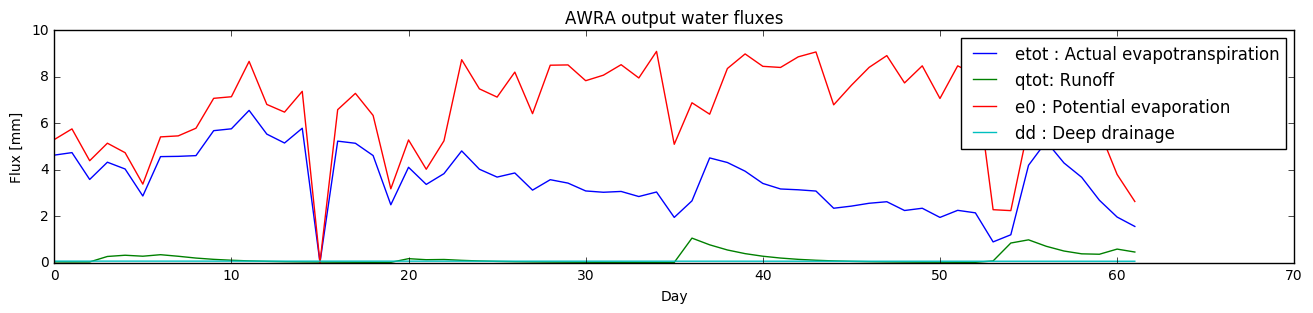

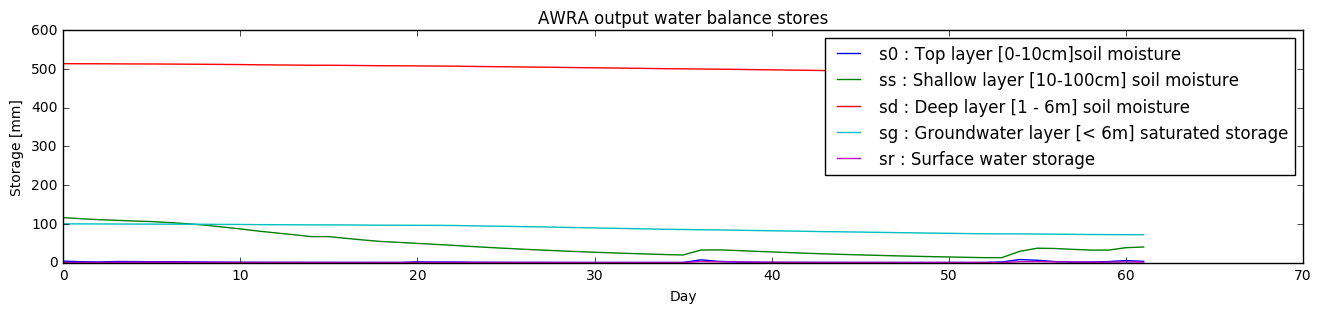

In [38]:
## use the ondemand simulation engine
from awrams.simulation import ondemand

# get and instance of the model runner engine - passing in the model (awral and input_map defined earlier)
runner = ondemand.OnDemandSimulator(awralmod,default_config) #,omapping=omap.mapping)

# Call the run fun function (within the OnDemandSimulator) over the defined period and extent
r,i = runner.run(period=period,extent=my_extent,return_inputs=True)

import pandas as pd

# Transfer inputs
# transfer climate inputs contained in i
forcing = ('tmin_f','tmax_f','solar_f','precip_f', 'u2t')
clm = {k:i[k].reshape(-1) for k in forcing}
df_clm = pd.DataFrame(clm,index=period)

# Plot inputs/outputs as timeseries
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (16,3))
plt.plot(df_clm)
plt.title('Climate inputs')
plt.legend(df_clm.columns)

plt.figure(figsize = (16,3))
plt.plot(r['etot'],label='etot : Actual evapotranspiration')
plt.plot(r['qtot'],label='qtot: Runoff')
plt.plot(r['e0'],label='e0 : Potential evaporation')
plt.plot(r['dd'],label='dd : Deep drainage')
plt.title('AWRA output water fluxes')
plt.xlabel('Day')
plt.ylabel('Flux [mm]')
plt.legend()
plt.figure(figsize = (16,3))

plt.plot(r['s0'],label='s0 : Top layer [0-10cm]soil moisture')
plt.plot(r['ss'],label='ss : Shallow layer [10-100cm] soil moisture')
plt.plot(r['sd'],label='sd : Deep layer [1 - 6m] soil moisture')
plt.plot(r['sg'],label='sg : Groundwater layer [< 6m] saturated storage')
plt.plot(r['sr'],label='sr : Surface water storage')
plt.xlabel('Day')
plt.ylabel('Storage [mm]')
plt.title('AWRA output water balance stores')
plt.legend()

print('AWRA output variable names r.keys():')
r.keys()

## Now onto a Python version of the AWRA-L code for demonstration....

#### [1.3 AWRA-L deconstructed]
[1.3 AWRA-L deconstructed]: 1.3_AWRA-L_deconstructed_-_Python_version_of_AWRA-L.ipynb